# Portfolio optimisation on python

## Import the data

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

%matplotlib inline

import warnings

In [2]:
#import pickle file
df = pd.read_pickle('data_acti.pkl')

In [3]:
df.head()

instrumentid,30566,30563,30560,30556,30555,30565,30557,30553,30568,30571,...,30570,30564,30569,30579,30578,2,7403,7,7401,1
2000-01-03,-0.008091,NaN,NaN,NaN,-0.004274,-0.002231,NaN,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.012706,-0.003801,-0.005355,-0.004181,-0.000878
2000-01-04,0.004894,-0.001542,0.000125,NaN,0.003365,0.001258,NaN,-0.008427,-0.011169,NaN,...,NaN,-0.041044,NaN,NaN,NaN,-0.014512,-0.029296,-0.007350,-0.018245,0.001154
2000-01-05,-0.007035,-0.002668,-0.000125,-0.006384,-0.003931,-0.001303,NaN,-0.007912,0.008456,NaN,...,-0.020489,-0.012950,NaN,NaN,NaN,-0.003386,-0.011830,-0.001131,-0.003765,-0.000240
2000-01-06,0.003270,-0.001408,0.000000,-0.001046,0.001857,0.000699,NaN,0.004431,-0.006994,NaN,...,-0.012488,0.012675,NaN,NaN,NaN,-0.001160,-0.014303,0.004081,-0.004351,-0.000709
2000-01-07,0.004074,0.008177,0.004863,0.004487,0.002202,0.000698,NaN,0.003088,0.001404,NaN,...,0.006850,0.021739,NaN,NaN,NaN,0.005831,0.003924,-0.000151,0.006369,-0.001186


In [4]:
#import mappind file
mapping = pd.read_excel('mapping.xlsx')

In [5]:
mapping = mapping.set_index('instrumentid')
mapping.head()

,shortname,longname,assetclass,type
instrumentid,,,,
30566,USTreas,US 10Y Treasury Note,BOND,FUTURE
30563,Bund,German Bund,BOND,FUTURE
30560,Bobl,German Medium-Term Debt,BOND,FUTURE
30556,Gilt,UK 10Y Note,BOND,FUTURE
30555,UST5Y,US 5Y Treasury Note,BOND,FUTURE


In [6]:
#matching the columns name with the mapping
dic_columns = {}
for column in df.columns:
    dic_columns[column] = mapping.loc[column,'shortname']
df.rename(columns = dic_columns, inplace = True)

In [7]:
df.head()

instrumentid,USTreas,Bund,Bobl,Gilt,UST5Y,UST2Y,BTP,CABOND,AUGOV,TIPS,...,UKEq,SwEq,AuEq,Gold,Cdty,USD,JPY,GBP,AUD,CHF
2000-01-03,-0.008091,NaN,NaN,NaN,-0.004274,-0.002231,NaN,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.012706,-0.003801,-0.005355,-0.004181,-0.000878
2000-01-04,0.004894,-0.001542,0.000125,NaN,0.003365,0.001258,NaN,-0.008427,-0.011169,NaN,...,NaN,-0.041044,NaN,NaN,NaN,-0.014512,-0.029296,-0.007350,-0.018245,0.001154
2000-01-05,-0.007035,-0.002668,-0.000125,-0.006384,-0.003931,-0.001303,NaN,-0.007912,0.008456,NaN,...,-0.020489,-0.012950,NaN,NaN,NaN,-0.003386,-0.011830,-0.001131,-0.003765,-0.000240
2000-01-06,0.003270,-0.001408,0.000000,-0.001046,0.001857,0.000699,NaN,0.004431,-0.006994,NaN,...,-0.012488,0.012675,NaN,NaN,NaN,-0.001160,-0.014303,0.004081,-0.004351,-0.000709
2000-01-07,0.004074,0.008177,0.004863,0.004487,0.002202,0.000698,NaN,0.003088,0.001404,NaN,...,0.006850,0.021739,NaN,NaN,NaN,0.005831,0.003924,-0.000151,0.006369,-0.001186


#### Converting back to prices ... special case here

In [8]:
df = np.cumprod(1 + df) * 1 #or whatever number

In [9]:
df.max()

instrumentid
USTreas    2.283441
Bund       2.479041
Bobl       1.704115
Gilt       2.008907
UST5Y      1.779575
UST2Y      1.289757
BTP        2.102047
CABOND     2.117391
AUGOV      1.763775
TIPS       1.887247
EurCorp    1.174364
UsCorp     1.534570
EMDebt     1.415888
UsEq       2.527596
CanEq      2.233573
EMEq       1.586886
JapEq      2.634921
EurEq      1.383205
SweEq      3.107167
UKEq       1.549134
SwEq       2.221427
AuEq       2.504373
Gold       1.358758
Cdty       1.261562
USD        1.209618
JPY        1.148360
GBP        1.089896
AUD        1.319175
CHF        1.635401
dtype: float64

## Adding obvious errors or missing values in the data

In [10]:
#df.loc['2013-04-12','UsEq'] = np.NaN

In [11]:
#df.loc['2017-04-12','CHF'] = np.NaN

In [12]:
#df.loc['2012-04-12','AUGOV'] = 8.4

In [13]:
#df.loc['2014-04-12','JPY'] = -10

In [14]:
#for i in range(len(df)):
    #if random.uniform(0, 1) > 0.9:
        #df.iloc[i,df.columns.get_loc("TIPS")] = np.NaN

## Cleaning unstructured or abstract time series from "multiple" "non-conform" sources

(0, 1)

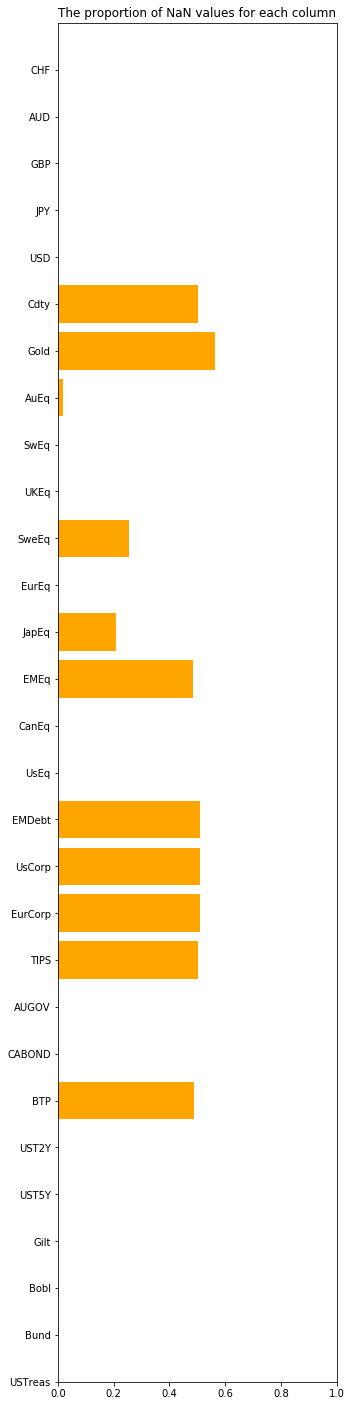

In [15]:
# Visualize NaN
plt.figure(figsize=(5,25))
plt.title('The proportion of NaN values for each column')
plt.barh(df.columns,df.isnull().mean(),color='orange')  
plt.ylim(0,len(df.columns))
plt.xlim(0,1)

### Dealing with missing values and frequency

In [16]:
def removenans(df):
    '''Remove leading NaNs from df.
    
    Args:
        df (dataframe or series): DataFrames whose columns are variables and 
            indexed by date
        inplace (bool): save to original dataframe
        
    Returns:
        df (dataframe or series): DataFrame without missing values
    
    Exception:
        if every row in df has at least one NaN or if there are
        non-leading NaNs in df. Returns dataframe or series depending on input.

    '''
    row = 0
    while ((row < len(df)) and (df.iloc[row,:].isnull().sum() != 0)):
        row += 1
    if row == len(df):
        # interrupt the program
        raise Exception('Every date has at least one NaN.')
    # subset dataframes
    df = df.iloc[row:,:]
    # check if there are still missings
    if ((~np.isfinite(df)).sum().sum() != 0):
        # still complete the program but raises a warning
        warnings.warn('There are still NaNs in df_in')
    return df

In [17]:
df = removenans(df)

## Analysing the missing values

In [18]:
df.head()

instrumentid,USTreas,Bund,Bobl,Gilt,UST5Y,UST2Y,BTP,CABOND,AUGOV,TIPS,...,UKEq,SwEq,AuEq,Gold,Cdty,USD,JPY,GBP,AUD,CHF
2011-04-12,1.750809,1.398430,1.287406,1.279691,1.532232,1.244632,1.035745,1.546855,1.161301,1.084010,...,0.884098,0.939802,1.461006,0.983801,1.177752,0.691514,0.846853,0.697800,1.106148,1.236491
2011-04-13,1.755394,1.398570,1.286908,1.278800,1.534658,1.245144,1.033007,1.554119,1.160873,1.084140,...,0.890622,0.942538,1.459548,0.988809,1.185025,0.691133,0.843157,0.698487,1.111875,1.237330
2011-04-14,1.752427,1.401094,1.288030,1.280582,1.532001,1.244447,1.031565,1.554991,1.162583,1.087418,...,0.884913,0.940434,1.453353,0.998537,1.181637,0.693212,0.853322,0.703685,1.115803,1.243625
2011-04-15,1.761597,1.406982,1.290274,1.289341,1.538124,1.246212,1.030556,1.562110,1.164296,1.096520,...,0.888379,0.947169,1.444971,1.012404,1.194667,0.695207,0.855212,0.703295,1.120821,1.242609
2011-04-18,1.766990,1.421562,1.298254,1.294388,1.542745,1.247095,1.027241,1.573006,1.163439,1.114804,...,0.871967,0.929699,1.446064,1.033597,1.201796,0.705632,0.878542,0.709222,1.128892,1.257801


In [19]:
# understand the frequency of the missing values
col = 'TIPS'
time = df.index
line = np.ones(len(time))
bol = df[col].isnull()

/Users/plonfat/anaconda3/envs/ml/lib/python3.7/site-packages/matplotlib/ticker.py:2036: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


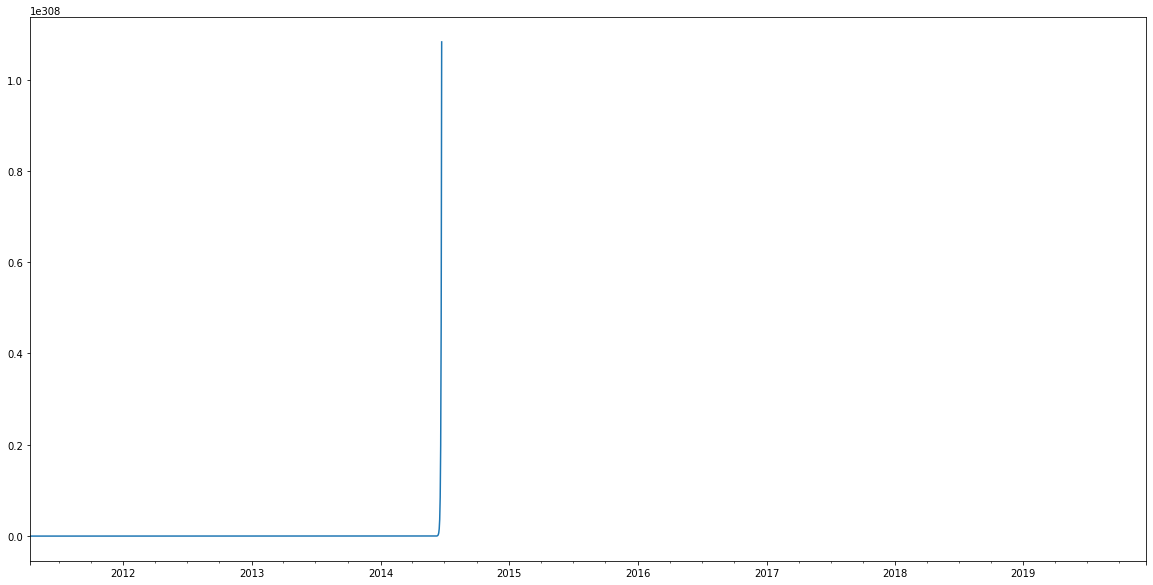

In [20]:
# transforming back to indices
(1+df[col]).cumprod().plot(figsize=(20,10))

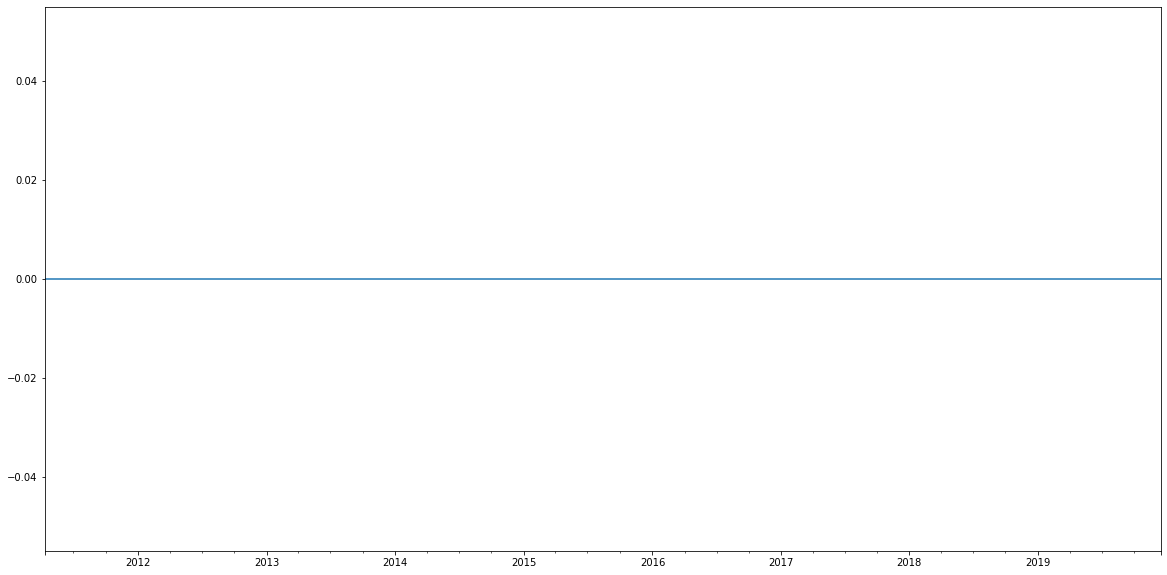

In [21]:
bol.astype(float).plot(figsize=(20,10))

In [22]:
list(df.index)

[Timestamp('2011-04-12 00:00:00', freq='B'),
 Timestamp('2011-04-13 00:00:00', freq='B'),
 Timestamp('2011-04-14 00:00:00', freq='B'),
 Timestamp('2011-04-15 00:00:00', freq='B'),
 Timestamp('2011-04-18 00:00:00', freq='B'),
 Timestamp('2011-04-19 00:00:00', freq='B'),
 Timestamp('2011-04-20 00:00:00', freq='B'),
 Timestamp('2011-04-21 00:00:00', freq='B'),
 Timestamp('2011-04-22 00:00:00', freq='B'),
 Timestamp('2011-04-25 00:00:00', freq='B'),
 Timestamp('2011-04-26 00:00:00', freq='B'),
 Timestamp('2011-04-27 00:00:00', freq='B'),
 Timestamp('2011-04-28 00:00:00', freq='B'),
 Timestamp('2011-04-29 00:00:00', freq='B'),
 Timestamp('2011-05-02 00:00:00', freq='B'),
 Timestamp('2011-05-03 00:00:00', freq='B'),
 Timestamp('2011-05-04 00:00:00', freq='B'),
 Timestamp('2011-05-05 00:00:00', freq='B'),
 Timestamp('2011-05-06 00:00:00', freq='B'),
 Timestamp('2011-05-09 00:00:00', freq='B'),
 Timestamp('2011-05-10 00:00:00', freq='B'),
 Timestamp('2011-05-11 00:00:00', freq='B'),
 Timestamp

In [23]:
# to nagivate through time we need to keep the timestamp format for the indexing 
df.loc[[pd.Timestamp('2011-04-13')]]

instrumentid,USTreas,Bund,Bobl,Gilt,UST5Y,UST2Y,BTP,CABOND,AUGOV,TIPS,...,UKEq,SwEq,AuEq,Gold,Cdty,USD,JPY,GBP,AUD,CHF
2011-04-13,1.755394,1.39857,1.286908,1.2788,1.534658,1.245144,1.033007,1.554119,1.160873,1.08414,...,0.890622,0.942538,1.459548,0.988809,1.185025,0.691133,0.843157,0.698487,1.111875,1.23733


## Random portfolios generator

Using logarithmic returns, since it's more cionvenient and it takes care of the normalization for the rest of the project. 

Difference between simple and log returns. Log returns are additive over time and simple return are additive accross assets (weighted).

In [24]:
# generating log returns
#log_ret = np.log(df/df.shift(1))

# generating simple returns
#simple_ret = (df - df.shift(1)) / df.shift(1)
#or
simple_ret = df / df.shift(1) - 1
simple_ret.dropna(inplace = True)

In [25]:
# generate random weights
weights = np.random.random(len(simple_ret.columns))
# making the sum of weights equal to 1
weights /= np.sum(weights)
#check
sum(weights)

1.0

In [26]:
# function generating random porfolios
rf = 0.0
n_ptf = 1000
pfolio_weights = []
pfolio_returns = []
pfolio_volatilities = []
pfolio_sharpe = []
num_assets = len(simple_ret.columns)

for x in range(n_ptf):
    
    # generating weights
    #weights = np.random.random(num_assets)
    #using exponential distribution is better cause its sample uniformely from portfiolios spaces constraint to full
    #investment
    weights = np.random.exponential(scale=1,size=num_assets)
    #adding a power, you push it more to the boundaries space
    weights = np.power(weights,5)
    # scaling to sum = 1
    weights /= np.sum(weights)
    pfolio_weights.append(weights)
    
    # expected portfolio returns
    pf_ret = np.sum(weights * simple_ret.mean()) * 252
    pfolio_returns.append(pf_ret)
    
    # expected volatility
    #pf_vol = np.sqrt(np.dot(weights.T,np.dot(simple_ret.cov() * 252, weights)))
    pf_vol = np.sqrt(weights.T@(simple_ret.cov()@weights)*252)
    pfolio_volatilities.append(pf_vol)
    
    # sharpe ratio
    pfolio_sharpe.append((pf_ret-rf)/pf_vol)

pfolio_weights = np.array(pfolio_weights)
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
pfolio_sharpe = np.array(pfolio_sharpe)

In [27]:
#np.isfinite(simple_ret.iloc[:,:2]).sum()
#np.max(simple_ret.iloc[:,:2])

In [28]:
# finding the ptf with the best sharpe value
print('Ptf with max sharpe ratio: {}'.format(pfolio_sharpe.max()))
print('Ptf number: {}'.format(pfolio_sharpe.argmax()))

# get the weights allocation of this porfolio with this max sh ratio
rand_maxsr_ret = pfolio_returns[pfolio_sharpe.argmax()]
rand_maxsr_vol = pfolio_volatilities[pfolio_sharpe.argmax()]

Ptf with max sharpe ratio: 1.7938497610801873
Ptf number: 704


In [29]:
# finding the ptf with the smallest volatility
print('Ptf with the min volatility: {}'.format(pfolio_volatilities.min()))
print('Ptf number: {}'.format(pfolio_volatilities.argmin()))

# get the weights allocation of this porfolio with min variance
rand_minvar_ret = pfolio_returns[pfolio_volatilities.argmin()]
rand_minvar_vol = pfolio_volatilities[pfolio_volatilities.argmin()]

Ptf with the min volatility: 0.007408705984325159
Ptf number: 195


In [30]:
# computing the returns and volatility of individual stocks
i_ret = simple_ret.mean() * 252
i_vol = np.sqrt(np.diag(simple_ret.cov())*252)

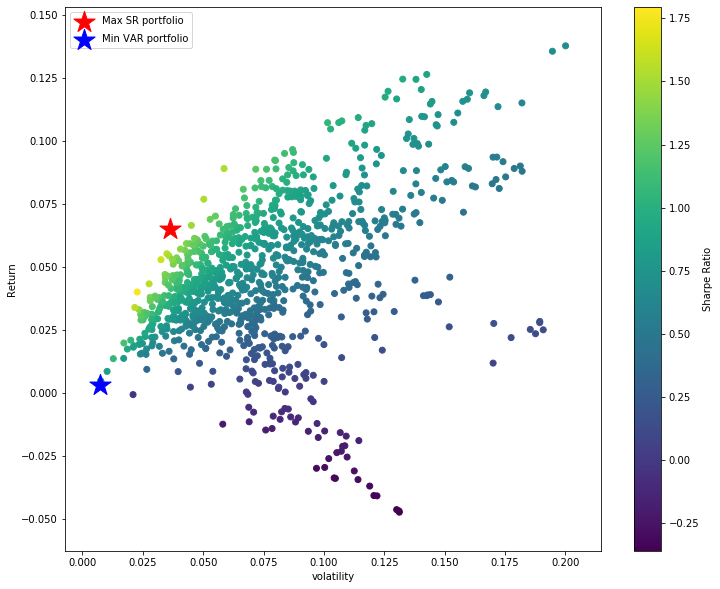

In [31]:
# ploting pfts
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(12)
sc = plt.scatter(pfolio_volatilities,pfolio_returns,c=pfolio_sharpe,cmap='viridis')
plt.colorbar(sc,label='Sharpe Ratio')
plt.xlabel('volatility')
plt.ylabel('Return')
plt.scatter(rand_maxsr_vol,rand_maxsr_ret,marker='*',c='red',s=500,label='Max SR portfolio')
plt.scatter(rand_minvar_vol,rand_minvar_ret,marker='*',c='blue',s=500,label='Min VAR portfolio')
#plt.scatter(i_vol,i_ret,c=['black','orange','magenta','cyan','grey','purple'],marker='*',s=100)
plt.legend(labelspacing=0.8)
plt.show()

In [32]:
simple_ret.columns

Index(['USTreas', 'Bund', 'Bobl', 'Gilt', 'UST5Y', 'UST2Y', 'BTP', 'CABOND',
       'AUGOV', 'TIPS', 'EurCorp', 'UsCorp', 'EMDebt', 'UsEq', 'CanEq', 'EMEq',
       'JapEq', 'EurEq', 'SweEq', 'UKEq', 'SwEq', 'AuEq', 'Gold', 'Cdty',
       'USD', 'JPY', 'GBP', 'AUD', 'CHF'],
      dtype='object', name='instrumentid')

In [33]:
simple_ret.cov().head()

instrumentid,USTreas,Bund,Bobl,Gilt,UST5Y,UST2Y,BTP,CABOND,AUGOV,TIPS,...,UKEq,SwEq,AuEq,Gold,Cdty,USD,JPY,GBP,AUD,CHF
instrumentid,,,,,,,,,,,,,,,,,,,,,
USTreas,0.000008,0.000006,0.000002,0.000007,0.000005,1.066533e-06,-6.058912e-07,0.000008,1.474881e-06,0.000008,...,-0.000008,-0.000008,-2.186618e-06,0.000007,-2.847643e-06,5.943341e-07,0.000006,-6.646439e-07,-1.190370e-06,0.000002
Bund,0.000006,0.000011,0.000005,0.000010,0.000003,6.451074e-07,-7.204289e-07,0.000007,3.018071e-06,0.000010,...,-0.000010,-0.000009,-2.052646e-06,0.000009,-6.362792e-07,4.570553e-06,0.000010,1.121484e-06,8.606628e-07,0.000003
Bobl,0.000002,0.000005,0.000002,0.000004,0.000001,2.643744e-07,-8.576654e-07,0.000003,1.143048e-06,0.000005,...,-0.000004,-0.000004,-6.964545e-07,0.000004,4.658229e-07,2.657682e-06,0.000005,1.059094e-06,1.082061e-06,0.000002
Gilt,0.000007,0.000010,0.000004,0.000014,0.000004,7.839855e-07,-2.468738e-07,0.000008,4.382712e-06,0.000008,...,-0.000011,-0.000011,-3.166568e-06,0.000009,-4.059684e-06,2.049603e-06,0.000010,-3.340456e-06,-1.518531e-06,0.000003
UST5Y,0.000005,0.000003,0.000001,0.000004,0.000003,7.152962e-07,-3.277059e-07,0.000004,7.372474e-07,0.000004,...,-0.000004,-0.000004,-1.153234e-06,0.000004,-1.694147e-06,-1.210857e-07,0.000003,-4.860161e-07,-7.143130e-07,0.000001


In [34]:
simple_ret.corr().head()

instrumentid,USTreas,Bund,Bobl,Gilt,UST5Y,UST2Y,BTP,CABOND,AUGOV,TIPS,...,UKEq,SwEq,AuEq,Gold,Cdty,USD,JPY,GBP,AUD,CHF
instrumentid,,,,,,,,,,,,,,,,,,,,,
USTreas,1.000000,0.627414,0.562473,0.622158,0.960649,0.783551,-0.036841,0.833653,0.127789,0.460470,...,-0.334100,-0.310284,-0.090003,0.260296,-0.121638,0.040110,0.362719,-0.046497,-0.073393,0.160040
Bund,0.627414,1.000000,0.924755,0.803429,0.553618,0.404411,-0.037379,0.641058,0.223133,0.494711,...,-0.333614,-0.289215,-0.072094,0.305174,-0.023192,0.263200,0.494185,0.066947,0.045280,0.185261
Bobl,0.562473,0.924755,1.000000,0.716816,0.498736,0.347353,-0.093264,0.572153,0.177116,0.518864,...,-0.292965,-0.261851,-0.051267,0.306380,0.035585,0.320760,0.487047,0.132505,0.119311,0.216847
Gilt,0.622158,0.803429,0.716816,1.000000,0.559155,0.425680,-0.011094,0.629776,0.280648,0.356072,...,-0.316363,-0.313337,-0.096329,0.265883,-0.128162,0.102228,0.427627,-0.172714,-0.069195,0.149824
UST5Y,0.960649,0.553618,0.498736,0.559155,1.000000,0.882023,-0.033444,0.773070,0.107214,0.401733,...,-0.292631,-0.286008,-0.079671,0.237075,-0.121461,-0.013716,0.315242,-0.057068,-0.073920,0.147931


So if the assets composing the portfolio are very correlated, there is little room for diversification. i.e example with taking only bonds. 
If you take the complete dataframe (with all assets) you cover more the space. If you have less assets there are regions that are impossible to reach. 

## Optimisation process

In [35]:
import scipy.optimize as optim

In [36]:
# building the different constraints

# checking if the sum of the weights is equal to 1 (in optimisation must be then = 0, this is how its works)
def check_sum(weights):
    return np.sum(weights) - 1

# checking if sign is strictly positive (or abover certain thesholds)
def check_sign(weights):
    return weights #- 0.05 # for setting weights above 0.05 for ex.

# setting up the objective function (minimizing optimiser, so have to negate sharpe ratio in order to maximise it)

# weights = weights of the portfolio
# er = expected returns (we expect the returns in the future to be the same as the one in the past)
# rf = estimated risk free rate

def objective_max_sr(weights,omega,er,rf):
    # mu = expected return of the portfolio
    mu = np.sum(weights*er)*252
    # sig = expected variance of the portfolio
    sig = np.sqrt(weights.T@omega@weights*252)
    # sr = sharpe ratio
    sr = (mu - rf) / sig
    return -sr

In [37]:
# setting up the optimisation process

# total number of assets
n_assets = len(simple_ret.columns)
# covariance matrix
omega = np.array(simple_ret.cov())
# expected returns
exp_r = simple_ret.mean()
# risk free rate
rf = 0.01
# initialize initial weights (generally equally weighted)
x0 = np.ones(n_assets) / n_assets

# setting all key words arguments
kwargs = {
    'args':(omega,exp_r,rf),
    'constraints':(
        {'type':'eq','fun':check_sum},
        {'type':'ineq','fun':check_sign},
    )
}

In [38]:
# initialize the optimisation process
sol = optim.minimize(objective_max_sr,x0,**kwargs)
# returns an object
sol

     fun: -1.8144012964098641
     jac: array([-0.30344975, -0.30404957, -0.21742865, -0.08579205, -0.17934659,
       -0.05042894, -0.30323507, -0.22159611, -0.30310754, -0.3048625 ,
        0.20930672,  0.50698881,  1.03715234, -0.30271459,  0.89696412,
        3.6428276 , -0.29997186,  0.50350094, -0.0498054 ,  0.45185187,
       -0.30495061, -0.30782108,  0.31635137,  2.73785749, -0.21826264,
        0.79885776,  0.25891592,  1.60592094, -0.30304769])
 message: 'Optimization terminated successfully.'
    nfev: 507
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([ 2.81233212e-02,  4.03087748e-01,  3.56266908e-15, -2.20526371e-14,
        3.44254961e-15,  2.10795473e-15,  1.12451061e-01,  1.92091919e-15,
        1.45666432e-01,  3.47621273e-02, -7.00609040e-16,  3.45643275e-16,
       -3.50730085e-15,  9.88458937e-02, -7.95896205e-15, -3.10200580e-14,
        1.47999828e-02, -2.79930713e-15,  1.98957482e-15, -1.63817178e-15,
        6.21181776e-02,  4.64901638e-0

In [39]:
# exploring the object that was returned

# Maximum sharpe ratio
sr_max = -sol.fun
sr_max

1.8144012964098641

In [40]:
# optimal weights
weights_opt = sol.x
weights_opt

array([ 2.81233212e-02,  4.03087748e-01,  3.56266908e-15, -2.20526371e-14,
        3.44254961e-15,  2.10795473e-15,  1.12451061e-01,  1.92091919e-15,
        1.45666432e-01,  3.47621273e-02, -7.00609040e-16,  3.45643275e-16,
       -3.50730085e-15,  9.88458937e-02, -7.95896205e-15, -3.10200580e-14,
        1.47999828e-02, -2.79930713e-15,  1.98957482e-15, -1.63817178e-15,
        6.21181776e-02,  4.64901638e-02,  1.49458392e-15, -1.39134168e-14,
        5.78494503e-15, -2.89994979e-15,  1.88659589e-15, -7.35099777e-15,
        5.36550921e-02])

In [41]:
weights_opt.min()

-3.1020058024023584e-14

In [42]:
# check if the optimisation did converge or not
sol.success

True

In [43]:
# extract optimal portfolio sharpe and volatility
opt_maxsr_pf_ret = np.sum(weights_opt * simple_ret.mean()) * 252
opt_maxsr_pf_vol = np.sqrt(weights_opt.T@simple_ret.cov()@weights_opt*252)

In [44]:
# finding the optimal weights for the minimum variance portfolio

def objective_min_vol(weights,omega):
    # sig = expected variance of the portfolio
    sig = np.sqrt(weights.T@omega@weights*252)
    return sig

# setting all key words arguments
kwargs2 = {
    'args':(omega),
    'constraints':(
        {'type':'eq','fun':check_sum},
        {'type':'ineq','fun':check_sign},
    )
}

# initialize the optimisation process
sol2 = optim.minimize(objective_min_vol,x0,**kwargs2)

# optimal weights
weights_opt = sol2.x

opt_minvar_pf_ret = np.sum(weights_opt * simple_ret.mean()) * 252
opt_minvar_pf_vol = np.sqrt(weights_opt.T@simple_ret.cov()@weights_opt*252)

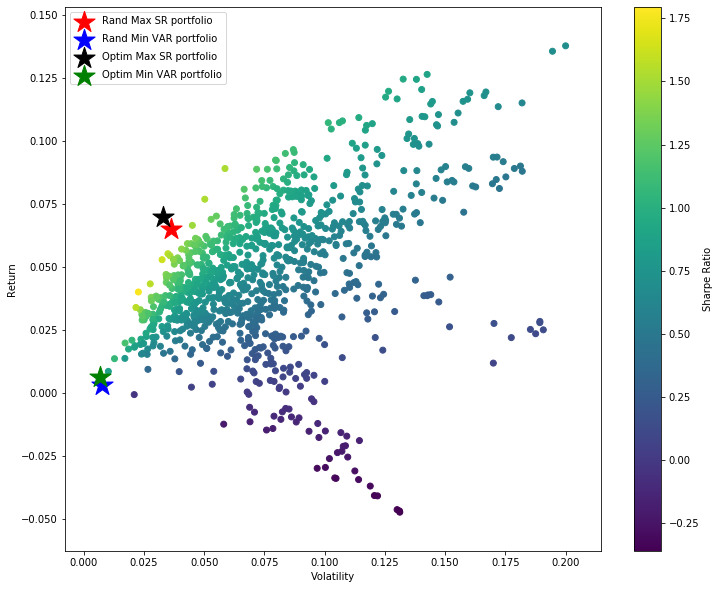

In [45]:
# ploting pfts
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(12)
sc = plt.scatter(pfolio_volatilities,pfolio_returns,c=pfolio_sharpe,cmap='viridis')
plt.colorbar(sc,label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(rand_maxsr_vol,rand_maxsr_ret,marker='*',c='red',s=500,label='Rand Max SR portfolio')
plt.scatter(rand_minvar_vol,rand_minvar_ret,marker='*',c='blue',s=500,label='Rand Min VAR portfolio')
plt.scatter(opt_maxsr_pf_vol,opt_maxsr_pf_ret,marker='*',c='black',s=500,label='Optim Max SR portfolio')
plt.scatter(opt_minvar_pf_vol,opt_minvar_pf_ret,marker='*',c='green',s=500,label='Optim Min VAR portfolio')
plt.legend(labelspacing=0.8)

plt.show()

## Drawing Markowitz Efficient Frontier


In [46]:
# additional constraint (minimise vol with a certain expected return)
def check_ret(weights,er,target_ret):
    mu = 252*np.sum(weights*er)
    return mu - target_ret

# here a more general constraint
def check_ret2(weights,a,b):
    # Equality constraint a'w = b
    # e.g. for weight constraints on a single asset class, use b as target weight and a contains 1 if
    # the asset is in the asset class, 0 otherwise
    mu = a@weights
    return mu - b

def objective_min_vol(weights,omega):
    # sig = expected variance of the portfolio
    sig = np.sqrt(weights.T@omega@weights*252)
    return sig

In [47]:
# creating the linspace to generate 

# finding highest return:
max_ret = max(simple_ret.mean()*252)
min_ret = opt_minvar_pf_ret

# generating linspace between portfolios 
rets = np.linspace(min_ret, max_ret, num=50)

# computing expected returns
exp_ret = simple_ret.mean()

In [48]:
eff_rets = []
eff_vols = []
for ret in rets:
    # adding an other constraint to the optimisation process
    # minimise vol with a certain expected return
    kwargs = {
        'args':(omega),
        'constraints':(
            {'type':'eq','fun':check_sum},
            {'type':'ineq','fun':check_sign},
            {'type':'eq','fun':check_ret,'args':(exp_ret,ret)}
        )
    }
    sol = optim.minimize(objective_min_vol,x0,**kwargs)
    weights_opt = sol.x
    eff_ret = np.sum(weights_opt * simple_ret.mean()) * 252
    eff_vol = np.sqrt(weights_opt.T@simple_ret.cov()@weights_opt*252)
    eff_rets.append(eff_ret)
    eff_vols.append(eff_vol)

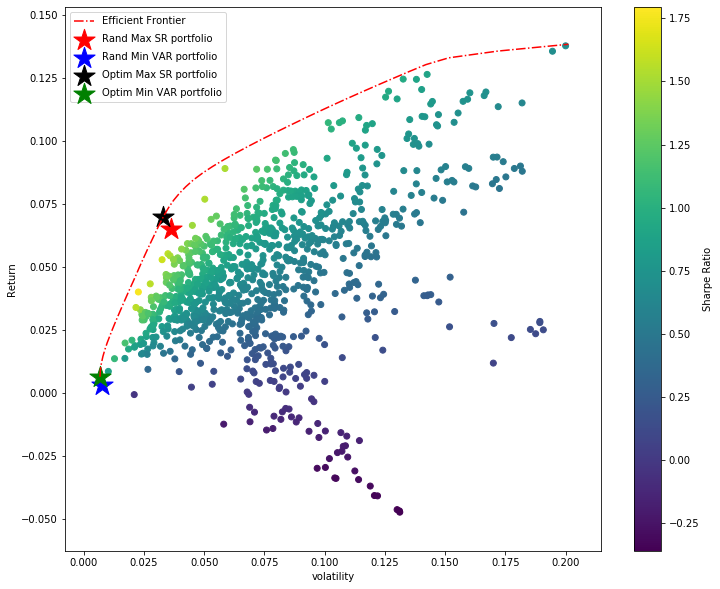

In [49]:
# ploting pfts
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(12)
sc = plt.scatter(pfolio_volatilities,pfolio_returns,c=pfolio_sharpe,cmap='viridis')
plt.colorbar(sc,label='Sharpe Ratio')
plt.plot(eff_vols, eff_rets, linestyle='-.', color='red', label='Efficient Frontier')
plt.xlabel('volatility')
plt.ylabel('Return')
plt.scatter(rand_maxsr_vol,rand_maxsr_ret,marker='*',c='red',s=500,label='Rand Max SR portfolio')
plt.scatter(rand_minvar_vol,rand_minvar_ret,marker='*',c='blue',s=500,label='Rand Min VAR portfolio')
plt.scatter(opt_maxsr_pf_vol,opt_maxsr_pf_ret,marker='*',c='black',s=500,label='Optim Max SR portfolio')
plt.scatter(opt_minvar_pf_vol,opt_minvar_pf_ret,marker='*',c='green',s=500,label='Optim Min VAR portfolio')
plt.legend(labelspacing=0.8)
plt.show()

## Implementing asset class risk constraints

In [50]:
# risk contribution per asset class
def riskcontr(weights,omega):
    # the returns the vector of risk contributions
    rc = (weights * (omega @ weights)) / np.sqrt(weights.T@omega@weights)
    return rc

In [51]:
# percentage of risk contribution per asset class
def percriskcontr(weights,omega):
    # the returns the vector of risk contributions in percentage
    rc = (weights * (omega @ weights)) / (weights.T@omega@weights)
    return rc

In [52]:
# if you want to use a risk constraint budjet in the optimiser for the portfolio
def check_risk(weights,omega,target_risk,asset_class):
    rc = percriskcontr(weights,omega)
    # to have the risk contribution of an asset_class, you need to index from the rc vector
    ac_rc = asset_class @ rc
    return target_risk - ac_rc

In [53]:
# defining the objective function
def objective_max_sr(weights,simple_ret,omega,rf):
    mu = np.sum(weights*simple_ret.mean())*252
    sig = np.sqrt(weights.T@omega@weights*252)
    sr = (mu - rf) / sig
    return -sr

In [54]:
def find_asset_class(name,df):
    pos = list(df.columns).index(name)
    asset_class = np.zeros(len(simple_ret.columns))
    asset_class[pos] = 1
    return asset_class

In [55]:
# setting up the optimisation process

# total number of assets
n_assets = len(simple_ret.columns)

# initialize initial weights (generally equally weighted)
x0 = np.ones(n_assets) / n_assets

# risk free rate
rf = 0.01

# covariance matrix
omega = np.array(simple_ret.cov())

# selecting which asset class and its target risk
asset_class = find_asset_class('UsEq',simple_ret)

# to see something move put stupid restrictions
#asset_class[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]] = 1.

target_risk = 0.0001


# setting all key words arguments
kwargs = {
    'args':(simple_ret,omega,rf),
    'constraints':(
        {'type':'eq','fun':check_sum},
        {'type':'ineq','fun':check_sign},
        {'type':'ineq','fun':check_risk,'args':(omega,target_risk,asset_class)}
    )
}

In [56]:
asset_class

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
# initialize the optimisation process
sol = optim.minimize(objective_max_sr,x0,**kwargs)
# optimal weights
weights_opt = sol.x
# compute results
opt_target_pf_ret = np.sum(weights_opt * simple_ret.mean()) * 252
opt_target_pf_vol = np.sqrt(weights_opt.T@simple_ret.cov()@weights_opt*252)

In [58]:
weights_opt*asset_class

array([ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  7.98910865e-05, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00])

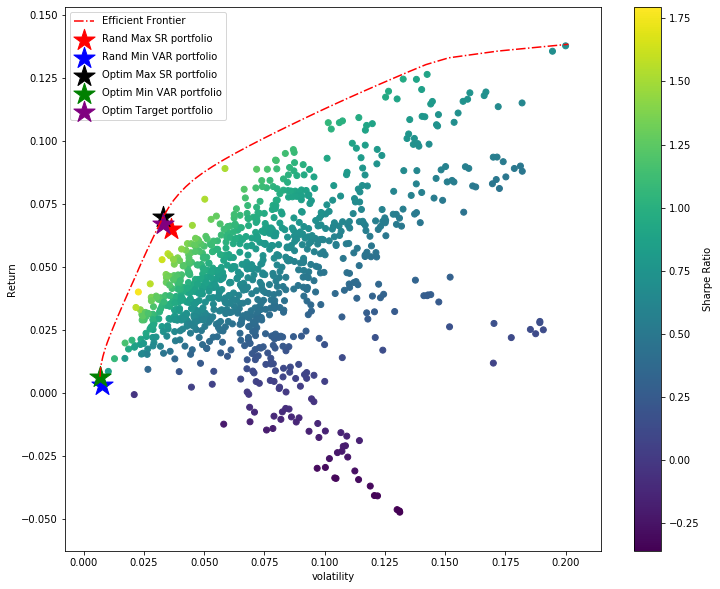

In [59]:
# ploting pfts
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(12)
sc = plt.scatter(pfolio_volatilities,pfolio_returns,c=pfolio_sharpe,cmap='viridis')
plt.colorbar(sc,label='Sharpe Ratio')
plt.plot(eff_vols, eff_rets, linestyle='-.', color='red', label='Efficient Frontier')
plt.xlabel('volatility')
plt.ylabel('Return')
plt.scatter(rand_maxsr_vol,rand_maxsr_ret,marker='*',c='red',s=500,label='Rand Max SR portfolio')
plt.scatter(rand_minvar_vol,rand_minvar_ret,marker='*',c='blue',s=500,label='Rand Min VAR portfolio')
plt.scatter(opt_maxsr_pf_vol,opt_maxsr_pf_ret,marker='*',c='black',s=500,label='Optim Max SR portfolio')
plt.scatter(opt_minvar_pf_vol,opt_minvar_pf_ret,marker='*',c='green',s=500,label='Optim Min VAR portfolio')
plt.scatter(opt_target_pf_vol,opt_target_pf_ret,marker='*',c='purple',s=500,label='Optim Target portfolio')
plt.legend(labelspacing=0.8)
plt.show()

## Resampling historical data for robustness purposes

We shall see a more diversified portfolio. Which will be more stable through time.

In [60]:
# lets first take out the last year 
simple_ret_in = simple_ret.loc[:'2018-12-31',:]
simple_ret_out = simple_ret.loc['2019-01-02':,:]

In [61]:
simple_ret_in.tail()

instrumentid,USTreas,Bund,Bobl,Gilt,UST5Y,UST2Y,BTP,CABOND,AUGOV,TIPS,...,UKEq,SwEq,AuEq,Gold,Cdty,USD,JPY,GBP,AUD,CHF
2018-12-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-12-26,-0.003032,0.000000,0.000000,0.000000,-0.001428,-0.000696,0.000000,0.000000,0.000000,-0.001114,...,0.000000,0.000000,0.000000,0.000526,0.000526,0.000526,0.002249,-0.003014,0.001378,0.000172
2018-12-27,0.004055,0.002288,0.001436,0.000482,0.002452,0.000843,0.006134,0.001682,-0.001186,0.001937,...,-0.012411,-0.029009,0.025827,0.010339,-0.011812,0.000439,-0.003356,-0.002601,-0.003674,0.000287
2018-12-28,0.000883,-0.001172,-0.000226,0.003295,0.000883,0.000366,0.000481,0.000000,0.001188,-0.002023,...,0.021024,0.031286,0.009781,0.000093,-0.002799,-0.002799,0.000137,0.001148,-0.001379,0.002571
2018-12-31,0.003153,0.000000,0.000000,-0.001121,0.001765,0.000659,0.000000,-0.000365,0.003569,0.002295,...,-0.001161,0.000000,-0.008251,0.004152,0.002043,0.000262,0.006690,0.004324,0.000760,-0.001209


In [62]:
simple_ret_out.head()

instrumentid,USTreas,Bund,Bobl,Gilt,UST5Y,UST2Y,BTP,CABOND,AUGOV,TIPS,...,UKEq,SwEq,AuEq,Gold,Cdty,USD,JPY,GBP,AUD,CHF
2019-01-02,0.001383,0.006732,0.002566,0.004731,0.000000,-0.000293,0.003769,0.002849,0.002379,0.007593,...,0.001240,0.000000,-0.013203,0.009633,0.001926,0.006781,0.010650,-0.003811,0.000990,0.004184
2019-01-03,0.007909,0.001104,0.000753,0.002155,0.005353,0.002270,-0.014220,0.008740,0.009163,0.005270,...,-0.003948,0.009574,0.016312,-0.000579,-0.008122,-0.003292,0.012739,-0.003410,-0.003719,-0.004350
2019-01-04,-0.006975,-0.005147,-0.001956,-0.006929,-0.004718,-0.001899,-0.000567,-0.007942,-0.004750,-0.004847,...,0.020127,0.015271,-0.002705,-0.006662,0.015037,-0.001534,-0.006751,0.007935,0.013593,0.001960
2019-01-07,-0.002007,-0.000062,-0.000452,0.002246,-0.001490,-0.000805,-0.001054,-0.001601,-0.002771,-0.004682,...,-0.004571,-0.010553,0.012477,-0.001572,0.006695,-0.004537,-0.007383,-0.000780,-0.000052,-0.000176
2019-01-08,-0.002388,-0.001355,-0.000679,-0.001680,-0.002238,-0.001209,-0.004302,-0.000292,-0.002770,0.002352,...,0.011250,0.015447,0.005715,-0.000136,0.001623,0.001748,0.000042,-0.001076,0.000906,0.001952


In [63]:
# for simplifications lets define a function for portfolio optimisation
rf = 0.01
def optim_ptf(simple_ret,rf):
    
    n_assets = len(simple_ret.columns)
    x0 = np.ones(n_assets) / n_assets
    
    omega = np.array(simple_ret.cov())

    kwargs = {
        'args':(simple_ret,omega,rf),
        'constraints':(
            {'type':'eq','fun':check_sum},
            {'type':'ineq','fun':check_sign},
        )
    }

    # find the portfolio with the maximum sharpe ratio
    sol = optim.minimize(objective_max_sr,x0,**kwargs)
    weights_opt = sol.x
    
    return  weights_opt

In [64]:
def subsample(subs,simple_ret,rf):
    weights_opt = []
    for i in range(0,subs):
        sampleind = np.random.choice(np.arange(len(simple_ret_in)),len(simple_ret_in),replace=True)
        simple_ret_in_i = simple_ret_in.iloc[sampleind,:]
        weights_opt_i = optim_ptf(simple_ret_in_i,rf)
        weights_opt.append(weights_opt_i)
    
    # compute average of the weights
    opt_pf_weights = np.mean(weights_opt,axis=0)
    
    return opt_pf_weights

In [65]:
def SR(df,weights,rf):
    omega = np.array(df.cov())
    mu = np.sum(weights*simple_ret.mean())*252
    sig = np.sqrt(weights.T@omega@weights*252)
    sr = (mu - rf) / sig
    return sr

In [66]:
opt_pf_weights = optim_ptf(simple_ret_in,rf)

In [67]:
opt_pf_weights2 = subsample(100,simple_ret_in,rf)

In [71]:
cr = np.cumprod(1 + simple_ret_out) - 1

In [68]:
sr = SR(simple_ret_out,opt_pf_weights,rf)

In [69]:
sr2 = SR(simple_ret_out,opt_pf_weights2,rf)

In [70]:
sr

2.0271517884535832

In [71]:
sr2

2.016923937953028

## Risk metrics (jp)

In [ ]:
# lets first take out the last year 
log_ret_in = log_ret.loc[:'2018-12-31',:]
log_ret_out = log_ret.loc['2019-01-02':,:]

In [ ]:
def RMcov(df,lamb=0.97):
    lamb = 0.97
    lambs = np.power(lamb,np.arange(len(df)))[::-1]
    weights = lambs/np.sum(lambs)

    matrix = pd.DataFrame(index = df.columns, columns = df.columns, data=np.zeros((len(df.columns),len(df.columns))))
    for i in range(len(df)):
        matrix += weights[i] * df.iloc[[i]].T@df.iloc[[i]]
    
    return matrix

In [ ]:
cov1 = df.cov()

In [ ]:
cov2 = RMcov(df)

In [ ]:
cov1 - cov2

## Backtesting

#### WARNING, WE MUST WORK IN PRICES BEFORE THE RESAMPLING

In [ ]:
# cumprod example
a = np.array([1,2,3])
np.cumprod(a)

In [ ]:
prices = np.cumprod(1 + log_ret) * 1 #or whatever number

In [ ]:
prices.head(3)

In [ ]:
# lets first take out the last year 
log_ret_in = log_ret.loc[:'2018-12-31',:]
log_ret_out = log_ret.loc['2019-01-02':,:]

In [ ]:
# extracting both indices
week_index = log_ret_out.resample('W').last().index
day_index = log_ret_out.index

In [ ]:
week_index

In [ ]:
day_index

### Defining the backtester

In [ ]:
start_date = '2018-12-31'

In [ ]:
ind1 = log_ret.index < start_date
ind2 = log_ret.index >= start_date

In [ ]:
log_ret_in = log_ret[ind1]
log_ret_out = log_ret[ind2]

In [ ]:
dates = log_ret_out.index.copy()

In [ ]:
dates

In [ ]:
rf = 0.01
fees = 0.01

for date in dates[:1]:
    # Defining input and output for the backtesting
    ind1 = log_ret.index < start_date
    ind2 = log_ret.index >= start_date
    log_ret_in = log_ret[ind1]
    log_ret_out = log_ret[ind2]
    
    # 
    

In [ ]:
#def backtester1(df,day,fee,method=None):
df = log_ret_out
day = 
fee = 0.001
    

In [ ]:
test = log_ret_out.resample('W').last()

In [ ]:
test.head()